In [1]:
# Exercise 1 - Clean the data

import pandas as pd

# Step 1: Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Original Dataset Info:")
print(df.info())

# Step 2: Check the summary for null values
print("\nSummary of Null Values:")
print(df.isnull().sum())

# Step 3: Determine the threshold for dropping columns with significant null values
threshold = len(df) * 0.5

# Drop columns with more than the threshold number of missing values
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Display basic information about the cleaned dataset
print("\nCleaned Dataset Info:")
print(df_cleaned.info())


Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB
None

Summary of Null Values:
Age               0
English           0
firstlanguage    26
sex               

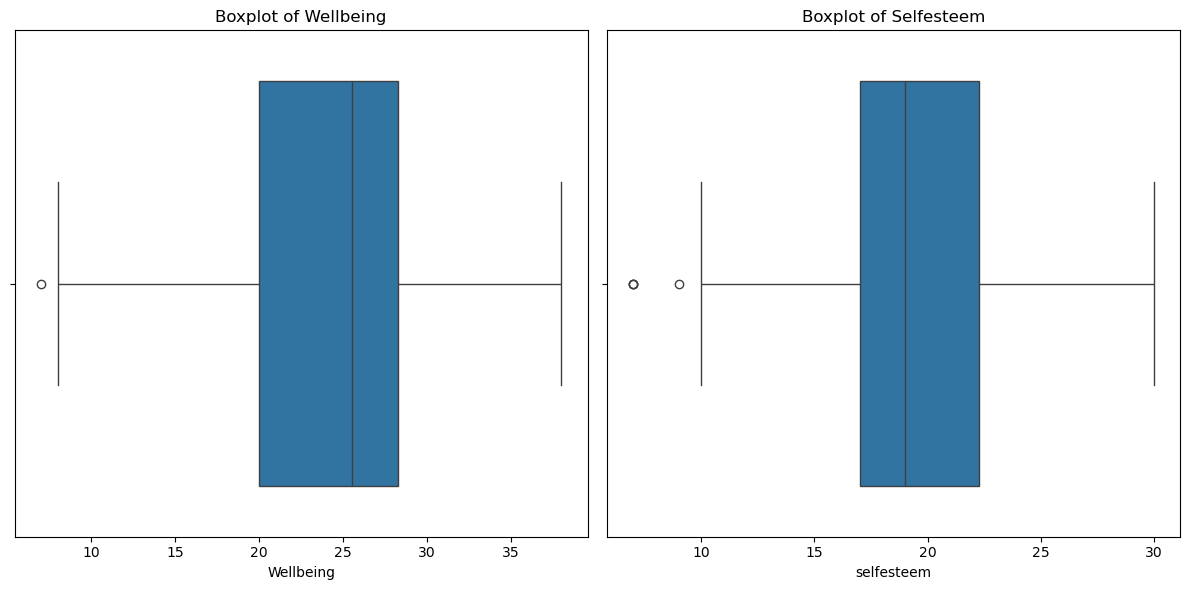

In [3]:
# Exercise 2 - Check for outliers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Boxplot for 'Wellbeing'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df_cleaned['Wellbeing'])
plt.title('Boxplot of Wellbeing')

# Boxplot for 'selfesteem'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df_cleaned['selfesteem'])
plt.title('Boxplot of Selfesteem')

# Show the plots
plt.tight_layout()
plt.show()


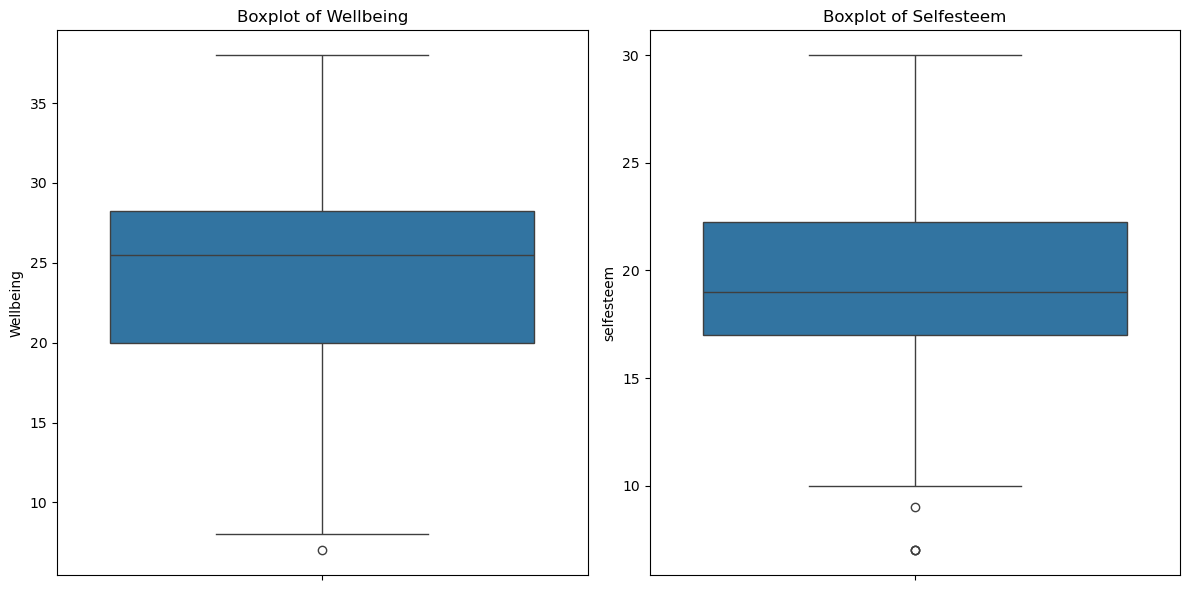

In [7]:
# Exercise 2 - Check for outliers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Boxplot for 'Wellbeing'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df_cleaned['Wellbeing'])  # Use y instead of x to rotate the boxplot
plt.title('Boxplot of Wellbeing')

# Boxplot for 'selfesteem'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=df_cleaned['selfesteem'])  # Use y instead of x to rotate the boxplot
plt.title('Boxplot of Selfesteem')

# Show the plots
plt.tight_layout()
plt.show()


In [9]:
# Exercise 3 - Removing outliers
import pandas as pd

def remove_outliers(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate upper and lower limits
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    # Filter out the outliers
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_normal

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers from 'Wellbeing'
df_no_outliers_wellbeing = remove_outliers(df_cleaned, 'Wellbeing')
print("Data after removing outliers from Wellbeing:")
print(df_no_outliers_wellbeing.info())

# Remove outliers from 'selfesteem'
df_no_outliers_selfesteem = remove_outliers(df_cleaned, 'selfesteem')
print("\nData after removing outliers from Selfesteem:")
print(df_no_outliers_selfesteem.info())


Data after removing outliers from Wellbeing:
<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          43 non-null     int64  
 1   English      43 non-null     object 
 2   sex          43 non-null     object 
 3   origin       43 non-null     object 
 4   Ukresidence  43 non-null     float64
 5   MAAS         43 non-null     float64
 6   Resilliance  43 non-null     int64  
 7   Wellbeing    43 non-null     int64  
 8   Stress       43 non-null     int64  
 9   selfesteem   43 non-null     int64  
 10  LoC          43 non-null     int64  
 11  sleep        43 non-null     int64  
 12  Year         43 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.7+ KB
None

Data after removing outliers from Selfesteem:
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 43
Data columns (total 13 columns):
 #   Column    

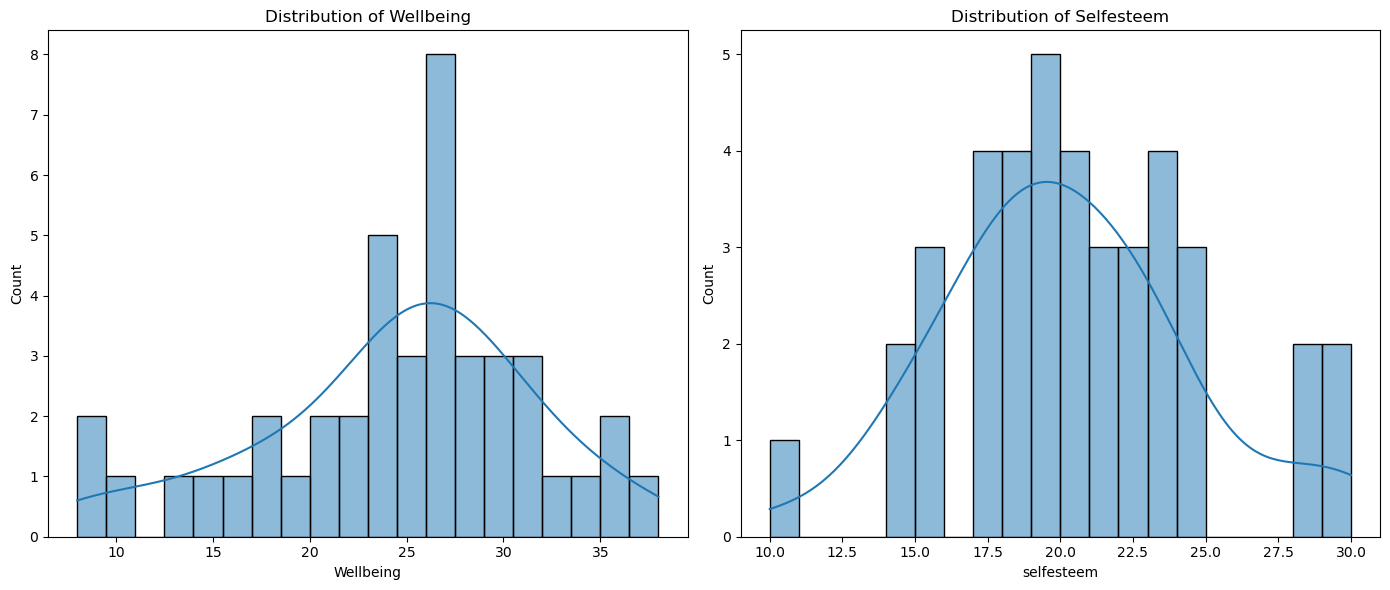

Mean of Wellbeing: 24.511627906976745
Median of Wellbeing: 26.0
Mean of Selfesteem: 20.175
Median of Selfesteem: 20.0


In [11]:
# Exercise 4 - Checking for normality

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers from 'Wellbeing'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

df_no_outliers_wellbeing = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers_selfesteem = remove_outliers(df_cleaned, 'selfesteem')

# Plot distributions with Seaborn
plt.figure(figsize=(14, 6))

# Distribution of 'Wellbeing'
plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers_wellbeing['Wellbeing'], kde=True, bins=20)  # Use histplot in newer versions of Seaborn
plt.title('Distribution of Wellbeing')

# Distribution of 'selfesteem'
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers_selfesteem['selfesteem'], kde=True, bins=20)  # Use histplot in newer versions of Seaborn
plt.title('Distribution of Selfesteem')

plt.tight_layout()
plt.show()

# Compare mean and median
mean_wellbeing = df_no_outliers_wellbeing['Wellbeing'].mean()
median_wellbeing = df_no_outliers_wellbeing['Wellbeing'].median()
mean_selfesteem = df_no_outliers_selfesteem['selfesteem'].mean()
median_selfesteem = df_no_outliers_selfesteem['selfesteem'].median()

print(f"Mean of Wellbeing: {mean_wellbeing}")
print(f"Median of Wellbeing: {median_wellbeing}")
print(f"Mean of Selfesteem: {mean_selfesteem}")
print(f"Median of Selfesteem: {median_selfesteem}")

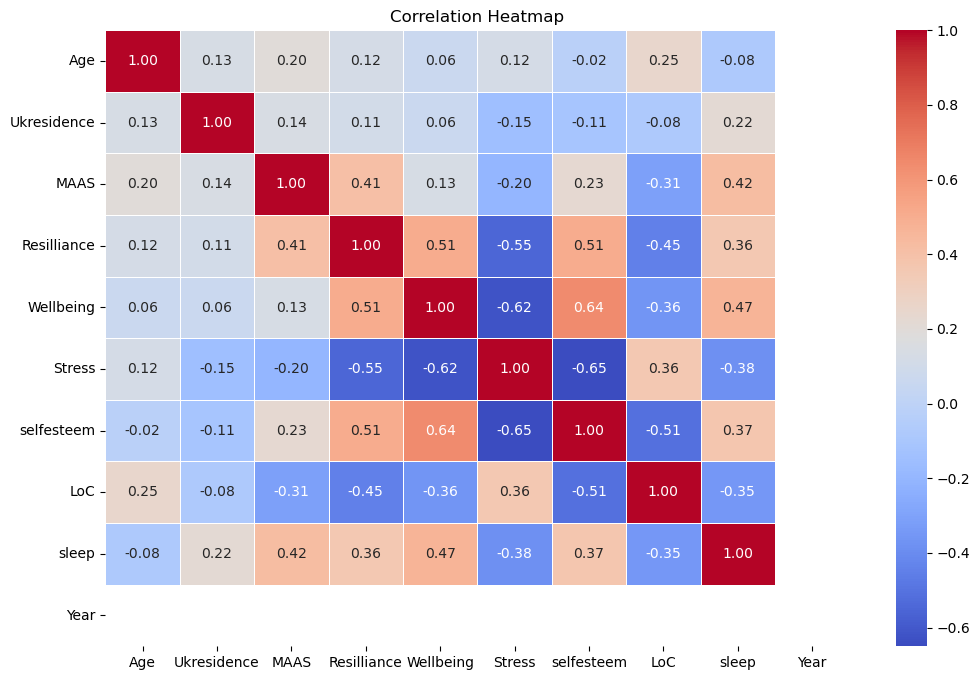

Correlation Matrix:
              Age  Ukresidence  MAAS  Resilliance  Wellbeing  Stress  \
Age          1.00         0.13  0.20         0.12       0.06    0.12   
Ukresidence  0.13         1.00  0.14         0.11       0.06   -0.15   
MAAS         0.20         0.14  1.00         0.41       0.13   -0.20   
Resilliance  0.12         0.11  0.41         1.00       0.51   -0.55   
Wellbeing    0.06         0.06  0.13         0.51       1.00   -0.62   
Stress       0.12        -0.15 -0.20        -0.55      -0.62    1.00   
selfesteem  -0.02        -0.11  0.23         0.51       0.64   -0.65   
LoC          0.25        -0.08 -0.31        -0.45      -0.36    0.36   
sleep       -0.08         0.22  0.42         0.36       0.47   -0.38   
Year          NaN          NaN   NaN          NaN        NaN     NaN   

             selfesteem   LoC  sleep  Year  
Age               -0.02  0.25  -0.08   NaN  
Ukresidence       -0.11 -0.08   0.22   NaN  
MAAS               0.23 -0.31   0.42   NaN  
Resilli

In [15]:
# Exercise 5 - Check which variables are most highly correlated

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers from 'Wellbeing'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

df_no_outliers_wellbeing = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers_selfesteem = remove_outliers(df_cleaned, 'selfesteem')

# Combine the datasets after removing outliers
df_combined = pd.merge(df_no_outliers_wellbeing, df_no_outliers_selfesteem, how='inner')

# Filter numeric columns only
numeric_columns = df_combined.select_dtypes(include='number')

# Create the correlation matrix
correlation_matrix = numeric_columns.corr().round(2)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



In [17]:
# Exercise 6 - Linear regression

import pandas as pd
from scipy.stats import linregress

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers from 'Wellbeing'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

df_no_outliers_wellbeing = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers_selfesteem = remove_outliers(df_cleaned, 'selfesteem')

# Combine the datasets after removing outliers
df_combined = pd.merge(df_no_outliers_wellbeing, df_no_outliers_selfesteem, how='inner')

# Create variables for the regression
x = df_combined['Wellbeing']
y = df_combined['selfesteem']

# Perform linear regression
regression = linregress(x, y)

# Display the results
print("Regression Results:")
print(f"Slope: {regression.slope:.2f}")
print(f"Y-Intercept: {regression.intercept:.2f}")
print(f"R-squared value: {regression.rvalue**2:.2f}")
print(f"P-value: {regression.pvalue:.4f}")

# Optional: Display the full regression object
print("\nFull Regression Object:")
print(regression)


Regression Results:
Slope: 0.45
Y-Intercept: 8.57
R-squared value: 0.41
P-value: 0.0000

Full Regression Object:
LinregressResult(slope=0.4548393197957324, intercept=8.565226362213933, rvalue=0.6420102771261641, pvalue=7.99794978586635e-06, stderr=0.08811451151517669, intercept_stderr=2.311012001510074)


Regression Results:
Slope: 0.45
Y-Intercept: 8.57
R-squared value: 0.41
P-value: 0.0000

Full Regression Object:
LinregressResult(slope=0.4548393197957324, intercept=8.565226362213933, rvalue=0.6420102771261641, pvalue=7.99794978586635e-06, stderr=0.08811451151517669, intercept_stderr=2.311012001510074)

Findings:
The model is statistically significant.
The proportion of the variance in selfesteem explained by Wellbeing is 0.41 or 41.2%.


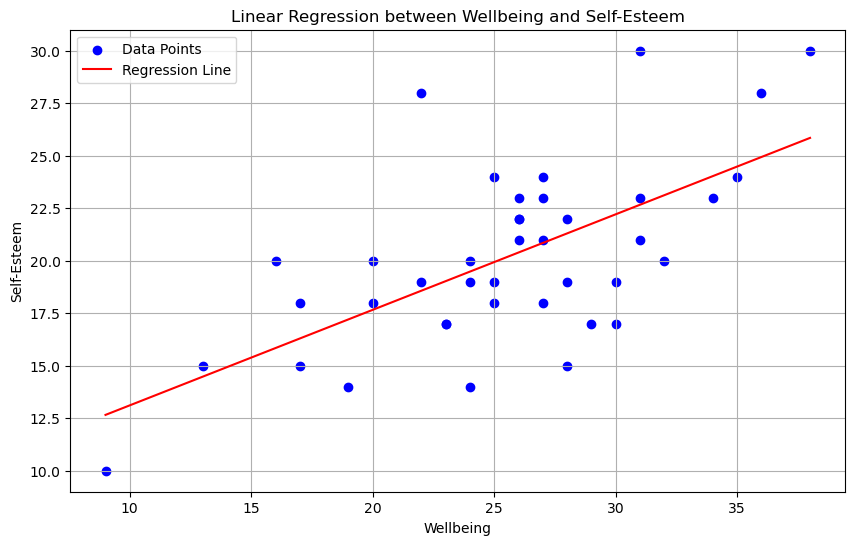

In [21]:
# Exercise 7 - understanding the output

import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers from 'Wellbeing'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

df_no_outliers_wellbeing = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers_selfesteem = remove_outliers(df_cleaned, 'selfesteem')

# Combine the datasets after removing outliers
df_combined = pd.merge(df_no_outliers_wellbeing, df_no_outliers_selfesteem, how='inner')

# Create variables for the regression
x = df_combined['Wellbeing']
y = df_combined['selfesteem']

# Perform linear regression
regression = linregress(x, y)

# Display the results
print("Regression Results:")
print(f"Slope: {regression.slope:.2f}")
print(f"Y-Intercept: {regression.intercept:.2f}")
print(f"R-squared value: {regression.rvalue**2:.2f}")
print(f"P-value: {regression.pvalue:.4f}")

# Optional: Display the full regression object
print("\nFull Regression Object:")
print(regression)

# Interpret the results
r_squared = regression.rvalue**2
p_value = regression.pvalue

print("\nFindings:")
# Check model significance
if p_value < 0.05:
    print("The model is statistically significant.")
else:
    print("The model is not statistically significant.")

# Check the explained variance
print(f"The proportion of the variance in selfesteem explained by Wellbeing is {r_squared:.2f} or {r_squared*100:.1f}%.")

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Regression line
slope = regression.slope
intercept = regression.intercept
x_values = pd.Series(x).sort_values()
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Titles and labels
plt.title('Linear Regression between Wellbeing and Self-Esteem')
plt.xlabel('Wellbeing')
plt.ylabel('Self-Esteem')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


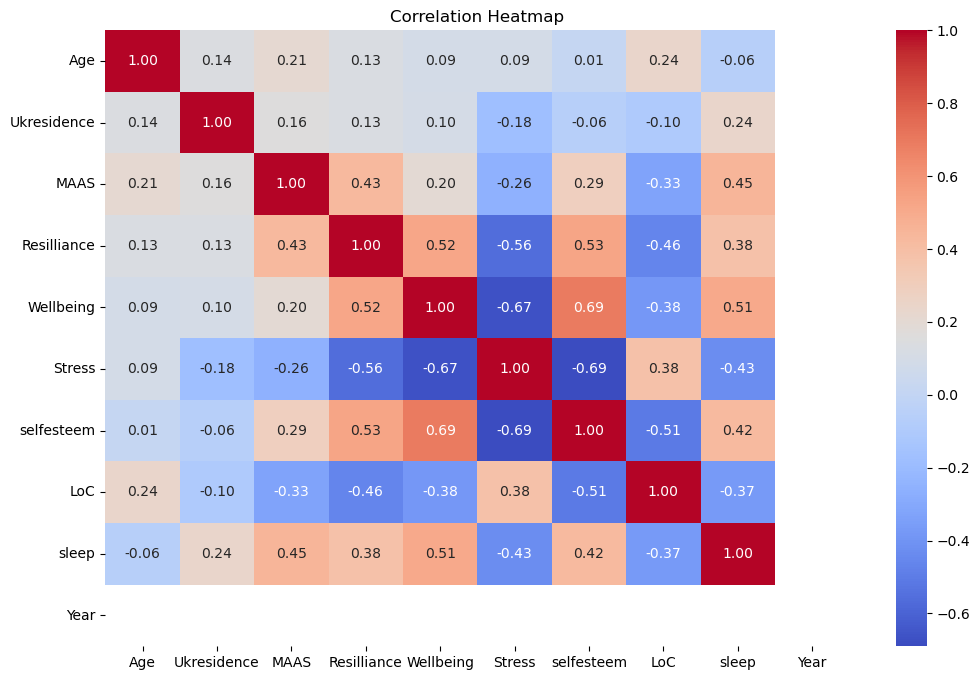


Regression Results for Wellbeing vs selfesteem:
Slope: 0.49
Y-Intercept: 7.54
R-squared value: 0.48
P-value: 0.0000

Full Regression Object:
LinregressResult(slope=0.49172610968319524, intercept=7.53732636382014, rvalue=0.6925218140357213, pvalue=5.261854953123173e-07, stderr=0.08202227296197874, intercept_stderr=2.1286898800697713)


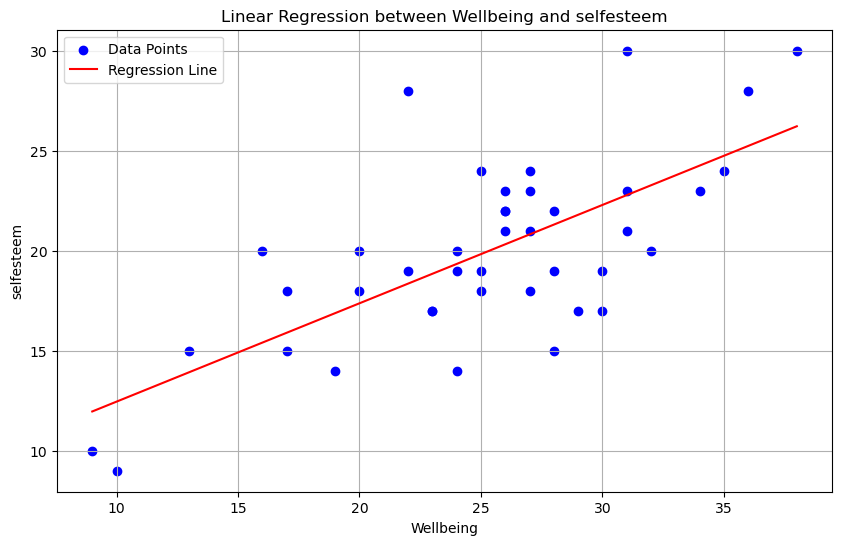


Regression Results for MAAS vs Resilliance:
Slope: 3.06
Y-Intercept: 23.66
R-squared value: 0.18
P-value: 0.0051

Full Regression Object:
LinregressResult(slope=3.0599382717417356, intercept=23.660916590870308, rvalue=0.42958226459616444, pvalue=0.005063692246361436, stderr=1.0299949723106454, intercept_stderr=3.9998584818987033)


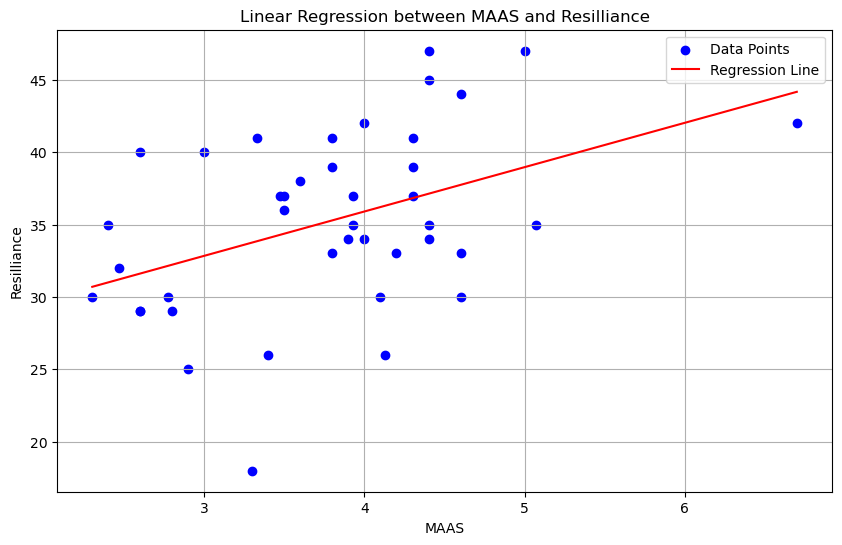

In [25]:
# Exercise 8 - Linear regression with other variables

import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

# Apply outlier removal
df_no_outliers = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers = remove_outliers(df_no_outliers, 'selfesteem')

# Filter numeric columns
df_numeric = df_no_outliers.select_dtypes(include=['number'])

# Recompute correlation matrix
correlation_matrix = df_numeric.corr().round(2)

# Create a heatmap to identify highly correlated variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated variables (replace with actual pairs from the heatmap)
highly_correlated_vars = [('Wellbeing', 'selfesteem'), 
                          ('MAAS', 'Resilliance')]  # Example pairs

# Perform linear regression on identified highly correlated variables
for var1, var2 in highly_correlated_vars:
    x = df_numeric[var1]
    y = df_numeric[var2]

    # Perform linear regression
    regression = linregress(x, y)

    # Display the results
    print(f"\nRegression Results for {var1} vs {var2}:")
    print(f"Slope: {regression.slope:.2f}")
    print(f"Y-Intercept: {regression.intercept:.2f}")
    print(f"R-squared value: {regression.rvalue**2:.2f}")
    print(f"P-value: {regression.pvalue:.4f}")

    # Optional: Display the full regression object
    print("\nFull Regression Object:")
    print(regression)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(x, y, color='blue', label='Data Points')

    # Regression line
    slope = regression.slope
    intercept = regression.intercept
    x_values = pd.Series(x).sort_values()
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='red', label='Regression Line')

    # Titles and labels
    plt.title(f'Linear Regression between {var1} and {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

# Comments comparing the results
# (To be written based on the actual output and findings from the regression analysis)




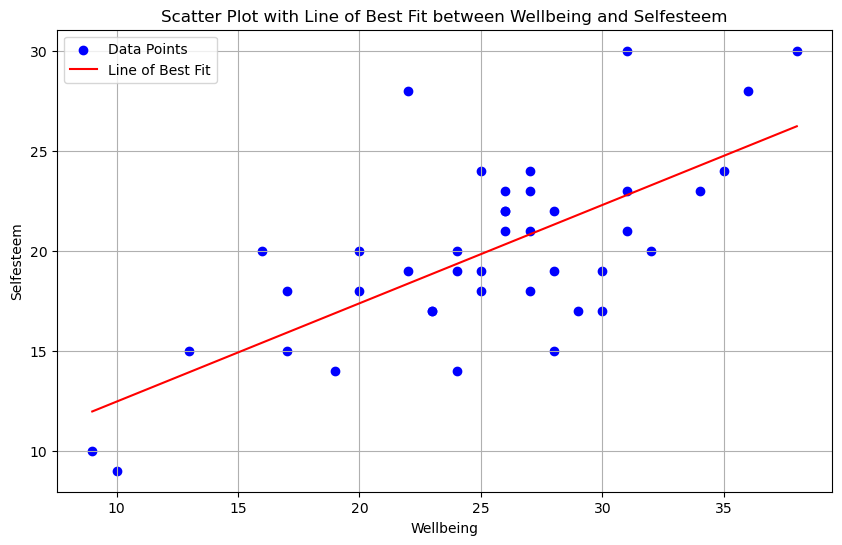

In [27]:
# Exercise 9 - Plotting a line of best fit

import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

# Apply outlier removal
df_no_outliers = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers = remove_outliers(df_no_outliers, 'selfesteem')

# Perform linear regression
x = df_no_outliers['Wellbeing']
y = df_no_outliers['selfesteem']
regression = linregress(x, y)

# Extract slope and intercept
slope = regression.slope
intercept = regression.intercept

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Line of Best Fit
x_values = pd.Series(x).sort_values()
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

# Titles and labels
plt.title('Scatter Plot with Line of Best Fit between Wellbeing and Selfesteem')
plt.xlabel('Wellbeing')
plt.ylabel('Selfesteem')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


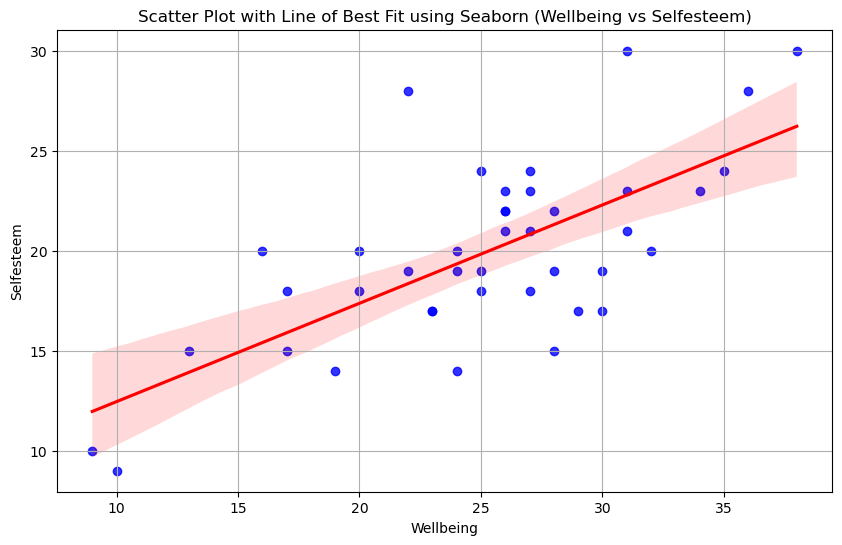

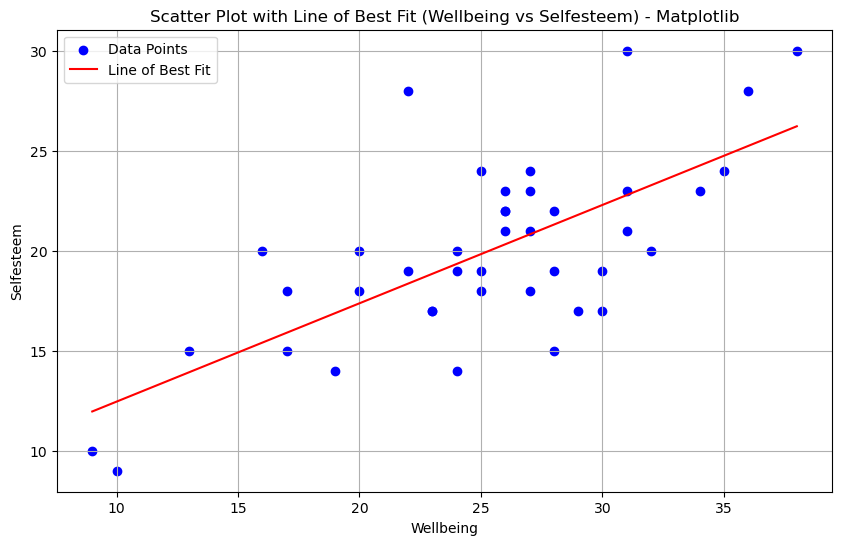

In [29]:
# Exercise 10 - using Seaborn to plot a regression line

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)

# Clean the dataset
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Remove outliers function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df_normal

# Apply outlier removal
df_no_outliers = remove_outliers(df_cleaned, 'Wellbeing')
df_no_outliers = remove_outliers(df_no_outliers, 'selfesteem')

# Extract data for regression
x = df_no_outliers['Wellbeing']
y = df_no_outliers['selfesteem']

# Perform linear regression
regression = linregress(x, y)

# Extract slope and intercept for comparison
slope = regression.slope
intercept = regression.intercept

# Plot using Seaborn's regplot
plt.figure(figsize=(10, 6))

sns.regplot(x='Wellbeing', y='selfesteem', data=df_no_outliers, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Titles and labels
plt.title('Scatter Plot with Line of Best Fit using Seaborn (Wellbeing vs Selfesteem)')
plt.xlabel('Wellbeing')
plt.ylabel('Selfesteem')

# Show plot
plt.grid(True)
plt.show()

# Compare with Matplotlib's plot from Exercise 9
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Line of Best Fit
x_values = pd.Series(x).sort_values()
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

# Titles and labels
plt.title('Scatter Plot with Line of Best Fit (Wellbeing vs Selfesteem) - Matplotlib')
plt.xlabel('Wellbeing')
plt.ylabel('Selfesteem')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
